# 요인분석 (패키지로 구현)
* 다양한 요인분석 예시를 구현.

* 구현 중 등장하는 다양한 주제가 있음.

* 위샤트분포, uniqueness, proportion Var, biplot 등등..

## 위샤트분포란?

* 위샤트분포(Wishart distribution)는 다변량 통계 분석에서 공분산 행렬의 확률 분포를 모델링하는 데 사용되는 분포이다. 
* 이 분포는 다변량 정규분포에서 유도되며, 특히 샘플 공분산 행렬의 분포를 나타내는 데 중요한 역할을 한다.
* 위샤트분포는 다음과 같은 특성을 가진다:

1. 정의:
* 위샤트분포는 다변량 정규분포에서 얻은 샘플 공분산 행렬이 따르는 분포이다. 
* $n$개의 샘플로 구성된 $p$-차원 다변량 정규분포를 고려할 때, 공분산 행렬 $\Sigma$에 대한 위샤트분포는 다음과 같이 정의된다:

$$
{W} \sim \mathcal{W}_p({\Sigma}, n)
$$

* 여기서 ${W}$는 $p \times p$ 공분산 행렬, ${\Sigma}$는 $p \times p$ 모수 공분산 행렬, $n$은 자유도이다.  

2.	확률 밀도 함수:
위샤트분포의 확률 밀도 함수는 다음과 같다:

$$
f({W}; {\Sigma}, n) = \frac
{|{W}|^{(n-p-1)/2} e^{-\frac{1}{2} \text{tr}({\Sigma}^{-1} {W})}}
{2^{np/2}~|{\Sigma}|^{n/2}~\Gamma_p\left(\frac{n}{2}\right)}
$$

* $|{W}|$는 행렬 $\mathbf{W}$의 행렬식
* $\text{tr}(\cdot)$은 행렬의 대각합
* $\Gamma_p(\cdot)$는 다변량 감마 함수이다.

3. 특성:
* 위샤트분포는 대칭적이고 양의 정부호인 행렬 분포이다. 
* 이는 샘플 공분산 행렬이 항상 대칭적이고 양의 정부호인 성질을 반영한다. 
* 자유도 $n$이 증가할수록 위샤트분포는 중심 극한 정리에 따라 모수 공분산 행렬 $\mathbf{\Sigma}$에 점점 가까워진다.

## 자료 생성

In [10]:
import numpy as np
import pandas as pd
from scipy.stats import wishart, multivariate_normal
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import FactorAnalysis
from factor_analyzer import FactorAnalyzer, calculate_kmo
import matplotlib.pyplot as plt

In [31]:
# 데이터 생성 및 기본 설정
np.random.seed(2022)

# 공분산 행렬 생성 (위샤트 분포)
pp = 8
Sigma = wishart.rvs(df=pp, scale=np.identity(pp), size=1)
R = np.diag(1 / np.sqrt(np.diag(Sigma))) @ Sigma @ np.diag(1 / np.sqrt(np.diag(Sigma)))

In [32]:
# 공분산 행렬과 상관 행렬 확인
print("공분산 행렬 Sigma:")
print(pd.DataFrame(np.round(Sigma, 2)))

공분산 행렬 Sigma:
      0     1     2     3     4      5     6      7
0  8.62 -0.00 -0.81  5.83  0.88  -0.26  2.99   2.93
1 -0.00  7.04 -0.37  0.75  1.43  -6.12  2.74  -0.34
2 -0.81 -0.37  2.91  0.69  0.47   2.26 -1.81  -2.73
3  5.83  0.75  0.69  5.97  1.48  -1.76  1.70  -1.46
4  0.88  1.43  0.47  1.48  6.37  -3.49 -0.35   0.94
5 -0.26 -6.12  2.26 -1.76 -3.49  18.66 -4.02  -0.92
6  2.99  2.74 -1.81  1.70 -0.35  -4.02  3.10   2.24
7  2.93 -0.34 -2.73 -1.46  0.94  -0.92  2.24  11.03


In [33]:
if np.linalg.det(Sigma) > 0:
    print("positive-definite")
else:
    print("not positive-definite")


positive-definite


In [34]:
# 상관 행렬 확인
print("상관 행렬 R:")
print(pd.DataFrame(np.round(R, 2)))

상관 행렬 R:
      0     1     2     3     4     5     6     7
0  1.00 -0.00 -0.16  0.81  0.12 -0.02  0.58  0.30
1 -0.00  1.00 -0.08  0.12  0.21 -0.53  0.59 -0.04
2 -0.16 -0.08  1.00  0.17  0.11  0.31 -0.60 -0.48
3  0.81  0.12  0.17  1.00  0.24 -0.17  0.40 -0.18
4  0.12  0.21  0.11  0.24  1.00 -0.32 -0.08  0.11
5 -0.02 -0.53  0.31 -0.17 -0.32  1.00 -0.53 -0.06
6  0.58  0.59 -0.60  0.40 -0.08 -0.53  1.00  0.38
7  0.30 -0.04 -0.48 -0.18  0.11 -0.06  0.38  1.00


In [35]:
# 데이터 생성
n = 10000
mu = np.zeros(pp)
d1 = multivariate_normal.rvs(mean=mu, cov=Sigma, size=n)
d1 = pd.DataFrame(d1, columns=[f'X{i}' for i in range(1, pp + 1)])

# 요인분석 예시 (1)

In [36]:
# 2. 요인분석 예시 (1)
# 공통 요인 3개
fa = FactorAnalyzer(n_factors=3, rotation=None)
fa.fit(StandardScaler().fit_transform(d1))
print("\n요인분석 결과 (공통 요인 3개):")
print(pd.DataFrame(fa.loadings_, columns=[f'Factor{i}' for i in range(1, 4)], index=d1.columns))


요인분석 결과 (공통 요인 3개):
     Factor1   Factor2   Factor3
X1  0.748448  0.537947 -0.389789
X2  0.460672 -0.248759  0.573484
X3 -0.461978  0.555078  0.356034
X4  0.598270  0.788165  0.150761
X5  0.149894  0.099784  0.254795
X6 -0.499020  0.292982 -0.460848
X7  0.959693 -0.272103 -0.021632
X8  0.339829 -0.325896 -0.428367


In [37]:
# 공통 요인 4개
fa = FactorAnalyzer(n_factors=4, rotation=None)
fa.fit(StandardScaler().fit_transform(d1))
print("\n요인분석 결과 (공통 요인 4개):")
print(pd.DataFrame(fa.loadings_, columns=[f'Factor{i}' for i in range(1, 5)], index=d1.columns))


요인분석 결과 (공통 요인 4개):
     Factor1   Factor2   Factor3   Factor4
X1  0.748038  0.464962 -0.440332  0.178834
X2  0.456694 -0.175522  0.484085 -0.325892
X3 -0.442483  0.567032  0.182519 -0.145944
X4  0.599789  0.781027 -0.062585 -0.153137
X5  0.233031  0.291256  0.705719  0.603886
X6 -0.501415  0.217163 -0.477180  0.130878
X7  0.947471 -0.303578 -0.086157 -0.236075
X8  0.373734 -0.418883 -0.255484  0.510804


In [38]:
# 공통 요인 5개
try:
    fa = FactorAnalyzer(n_factors=5, rotation=None)
    fa.fit(StandardScaler().fit_transform(d1))
    print("\n요인분석 결과 (공통 요인 5개):")
    print(pd.DataFrame(fa.loadings_, columns=[f'Factor{i}' for i in range(1, 6)], index=d1.columns))
except Exception as e:
    print("\n요인분석 결과 (공통 요인 5개)에서 에러 발생:", e)


요인분석 결과 (공통 요인 5개):
     Factor1   Factor2   Factor3   Factor4   Factor5
X1  0.709962  0.540150 -0.426053  0.079305  0.141009
X2  0.559923 -0.267555  0.634870 -0.326830  0.323915
X3 -0.458603  0.544394  0.324192 -0.151241  0.201499
X4  0.570624  0.801439  0.011122 -0.146330 -0.140007
X5  0.236347  0.246251  0.587565  0.731375  0.015295
X6 -0.534688  0.247955 -0.422297 -0.013197  0.328045
X7  0.945512 -0.248398 -0.140488 -0.214866 -0.015783
X8  0.367051 -0.359880 -0.388234  0.447020  0.211226


## 결과 해석
1. 공통요인 3개  
    • Factor1: 변수 X1, X4, X7이 높은 적재값을 가지므로, 이 요인은 이 변수들과 강한 상관관계를 가지는 것으로 보인다.  

    • Factor2: 변수 X1과 X4가 높은 적재값을 가지며, X3과도 어느 정도 상관관계를 가진다. 하지만 X2와 X8은 음의 상관관계를 보인다.
 
    • Factor3: 변수 X2가 높은 적재값을 가지며, X3과도 상관관계를 가진다. X1과 X6은 음의 상관관계를 보인다.  

2. 공통요인 4개
    • Factor1: 변수 X1, X4, X7이 여전히 높은 적재값을 가지며, 이 요인은 이 변수들과 강한 상관관계를 가진다.

    • Factor2: 변수 X1과 X4는 높은 적재값을 가지며, X3과도 상관관계를 가진다. X2와 X8은 음의 상관관계를 보인다.

    • Factor3: 변수 X2가 높은 적재값을 가지며, X5와도 강한 상관관계를 가진다.

    • Factor4: 변수 X5와 X8이 높은 적재값을 가지며, 이 요인은 이 변수들과 강한 상관관계를 가진다.

3. 공통요인 5개
    • Factor1: 변수 X1, X4, X7이 여전히 높은 적재값을 가지며, 이 요인은 이 변수들과 강한 상관관계를 가진다.

    • Factor2: 변수 X1과 X4가 높은 적재값을 가지며, X3과도 상관관계를 가진다. X2와 X8은 음의 상관관계를 보인다.

    • Factor3: 변수 X2가 높은 적재값을 가지며, X5와도 강한 상관관계를 가진다.

    • Factor4: 변수 X5와 X8이 높은 적재값을 가지며, 이 요인은 이 변수들과 강한 상관관계를 가진다.

    • Factor5: 변수 X2와 X5가 높은 적재값을 가지며, 이 요인은 이 변수들과 강한 상관관계를 가진다.

# 요인분석 예시 (2)
* 이번에는 분석에 도움이 되지 않는 특정 변수를 제외하고 분석을 진행했다.  
* 변수 6: 다른 변수들과 높은 상관관계를 가짐.
    * 변수 0, 1, 2와 상관관계가 특히 높음

* 변수 7:
    * 변수 2와 음의 상관관계 (-0.48)
    
    * 변수 6과 양의 상관관계 (0.38)

In [19]:
# 공통 요인 3개 + 6, 7번째 변수 제외
fa = FactorAnalyzer(n_factors=3, rotation=None)
fa.fit(StandardScaler().fit_transform(d1.drop(columns=['X6', 'X7'])))
print("\n요인분석 결과 (공통 요인 3개, 6, 7번째 변수 제외):")
print(pd.DataFrame(fa.loadings_, 
                   columns=[f'Factor{i}' for i in range(1, 4)], index=d1.drop(columns=['X6', 'X7']).columns))


요인분석 결과 (공통 요인 3개, 6, 7번째 변수 제외):
     Factor1   Factor2   Factor3
X1  0.910061  0.247754 -0.260013
X2  0.100035 -0.026700  0.176660
X3 -0.003824 -0.580856  0.034988
X4  0.927506 -0.325532 -0.174482
X5  0.399740 -0.088633  0.911050
X8  0.128772  0.872400  0.129996


In [20]:
# 공통 요인 3개 + 7번째 변수 제외
fa = FactorAnalyzer(n_factors=3, rotation=None)
fa.fit(StandardScaler().fit_transform(d1.drop(columns=['X7'])))
print("\n요인분석 결과 (공통 요인 3개, 7번째 변수 제외):")
print(pd.DataFrame(fa.loadings_, columns=[f'Factor{i}' for i in range(1, 4)], 
                   index=d1.drop(columns=['X7']).columns))



요인분석 결과 (공통 요인 3개, 7번째 변수 제외):
     Factor1   Factor2   Factor3
X1  0.880092  0.279450  0.385806
X2  0.239675 -0.380025 -0.292698
X3 -0.127218  0.498359 -0.483643
X4  0.882310  0.410028 -0.235533
X5  0.278093 -0.149106 -0.181569
X6 -0.444250  0.805639  0.391489
X8  0.156101 -0.345035  0.648965


In [21]:
# 공통 요인 4개 + 7번째 변수 제외
try:
    fa = FactorAnalyzer(n_factors=4, rotation=None)
    fa.fit(StandardScaler().fit_transform(d1.drop(columns=['X7'])))
    print("\n요인분석 결과 (공통 요인 4개, 7번째 변수 제외):")
    print(pd.DataFrame(fa.loadings_, columns=[f'Factor{i}' for i in range(1, 5)], 
                       index=d1.drop(columns=['X7']).columns))
except Exception as e:
    print("\n요인분석 결과 (공통 요인 4개, 7번째 변수 제외)에서 에러 발생:", e)


요인분석 결과 (공통 요인 4개, 7번째 변수 제외):
     Factor1   Factor2   Factor3   Factor4
X1  0.853686  0.190479  0.429391 -0.096195
X2  0.252695 -0.204624 -0.419831  0.026345
X3 -0.180989  0.633795 -0.205764  0.350042
X4  0.842838  0.531794 -0.032910 -0.029643
X5  0.317228 -0.058417 -0.248466  0.416253
X6 -0.479645  0.520425  0.698399  0.087141
X8  0.252452 -0.698182  0.569712  0.291344


## 결과 해석
1. 공통 요인 3개 + 6, 7번째 변수 제외

	• Factor1: 변수 X1, X4, X5가 높은 적재값을 가지며, 이 요인은 이 변수들과 강한 상관관계를 가진다.

	• Factor2: 변수 X8이 높은 적재값을 가지며, 이 요인은 변수 X8과 강한 상관관계를 가진다. 반면, X3은 음의 상관관계를 보인다.  

	• Factor3: 변수 X5가 높은 적재값을 가지며, 이 요인은 변수 X5와 강한 상관관계를 가진다.  

2. 공통 요인 3개 + 7번째 변수 제외

	• Factor1: 변수 X1, X4, X5가 높은 적재값을 가지며, 이 요인은 이 변수들과 강한 상관관계를 가진다.

	• Factor2: 변수 X8이 높은 적재값을 가지며, 이 요인은 변수 X8과 강한 상관관계를 가진다. 반면, X3은 음의 상관관계를 보인다.  
	
    • Factor3: 변수 X5가 높은 적재값을 가지며, 이 요인은 변수 X5와 강한 상관관계를 가진다.  

3. 공통 요인 4개, 7번째 변수 제외

	• Factor1: 변수 X1, X4가 높은 적재값을 가지며, 이 요인은 이 변수들과 강한 상관관계를 가진다.  
    
	• Factor2: 변수 X3, X6, X8이 높은 적재값을 가지며, 이 요인은 이 변수들과 강한 상관관계를 가진다.  
	
    • Factor3: 변수 X5가 높은 적재값을 가지며, 이 요인은 변수 X5와 강한 상관관계를 가진다.  
	
    • Factor4: 변수 X8이 높은 적재값을 가지며, 이 요인은 변수 X8과 강한 상관관계를 가진다.  

# uniqueness

* Uniqueness는 요인분석에서 각 변수들이 공통 요인들로 설명되지 않는 고유한 변동성을 나타내는 지표이다. 
* 즉, 특정 변수가 공통 요인들로 얼마나 설명되지 않는지를 나타내는 값으로, 각 변수의 특이 요인(잔차) 분산을 의미한다.
* Uniqueness는 다음과 같은 특성을 가진다:

1. 정의:
* Uniqueness는 각 변수의 전체 분산에서 공통 요인들에 의해 설명되는 분산을 제외한 나머지 분산으로 정의된다. 
* 수식으로 표현하면 다음과 같다:

$$
\text{Uniqueness} = 1 - \sum~\{({\text{Factor Loadings}})^2\}
$$

* $\sum~\{({\text{Factor Loadings}})^2\}$ = 각 변수에 대한 요인 적재량의 제곱 합.

2. 해석:
* Uniqueness 값이 작을수록 해당 변수는 공통 요인들에 의해 잘 설명된다는 것을 의미한다.
* 반면, Uniqueness 값이 클수록 해당 변수는 공통 요인들로 설명되지 않는 고유한 변동성이 크다는 것을 나타낸다. 
* 일반적으로 Uniqueness 값은 0과 1 사이의 값을 가지며, 다음과 같이 해석할 수 있다:  
	•	0에 가까울수록: 변수는 공통 요인들로 거의 완벽하게 설명된다.  
	•	1에 가까울수록: 변수는 공통 요인들로 거의 설명되지 않는다.

3.	계산 방법:
*  Uniqueness는 요인분석의 결과로 얻은 요인 적재량 행렬을 사용하여 계산된다.
* 각 변수의 Uniqueness는 다음과 같이 계산된다:
$$
\text{Uniqueness}_{i} = 1 - \sum{j=1}^{m} (\text{Factor Loadings}_{ij})^2
$$

* \text{Factor Loadings}_{ij} = 변수 i와 요인 j 간의 요인 적재량
* m = (공통 요인의 수).

4.	예시:
* 예를 들어, 특정 변수 X_i에 대한 요인 적재량이 [0.6, 0.4, 0.3]이라면, 이 변수의 Uniqueness는 다음과 같이 계산된다:
$$
\text{Uniqueness}_i = 1 - (0.6^2 + 0.4^2 + 0.3^2) = 1 - (0.36 + 0.16 + 0.09) = 0.39
$$

In [22]:
# 패키지로 계산한 uniqueness
fa = FactorAnalyzer(n_factors=3, rotation=None)
fa.fit(StandardScaler().fit_transform(d1))
unique1 = np.round(fa.get_uniquenesses(), 3)

In [23]:
# 직접 계산한 uniqueness
loadings = fa.loadings_
unique2 = np.round(1 - np.sum(loadings**2, axis=1), 3)

In [40]:
# uniqueness 비교
print("\n패키지의 uniqueness와 직접 계산한 uniqueness 비교:")
print("패키지의 uniqueness:", unique1)
print("직접 계산한 uniqueness:", unique2)
if np.all(unique1 == unique2):
    print("둘은 서로 같다.")
else:
    print("둘은 서로 다르다.")


패키지의 uniqueness와 직접 계산한 uniqueness 비교:
패키지의 uniqueness: [-0.001  0.397  0.352 -0.002  0.903  0.453  0.004  0.595]
직접 계산한 uniqueness: [-0.001  0.397  0.352 -0.002  0.903  0.453  0.004  0.595]
둘은 서로 같다.


# Proportion Var

* 공통 요인들이 데이터의 전체 변동성 중 얼마나 설명하는지를 나타내는 비율.
* 공통 요인들이 각 변수들의 분산을 얼마나 잘 설명하는지를 평가하는 중요한 지표.

1. 정의:
* Proportion Var는 요인 적재량의 제곱 합이 각 변수들의 전체 분산에서 차지하는 비율로 정의된다. 
* 수식으로 표현하면 다음과 같다:

$$
\text{Proportion Var} = \frac{\sum (\text{Factor Loadings}^2)}{\text{Total Variance}}
$$

* $\sum (\text{Factor Loadings}^2)$는 요인 적재량의 제곱 합을 의미.
* $\text{Total Variance}$는 변수들의 전체 분산을 의미.

2. 해석:
* Proportion Var 값이 클수록 공통 요인들이 데이터의 변동성을 잘 설명한다는 것을 의미한다. 
* 각 요인에 대한 Proportion Var는 다음과 같은 방법으로 해석될 수 있다:  
	•	Proportion Var가 높을수록: 해당 요인은 데이터의 변동성을 잘 설명한다.  
	•	Proportion Var가 낮을수록: 해당 요인은 데이터의 변동성을 잘 설명하지 못한다.  

3.	계산 방법:
* Proportion Var는 요인분석 결과로 얻은 요인 적재량 행렬을 사용하여 계산된다.
* 각 요인에 대한 Proportion Var는 다음과 같이 계산된다:
$$
\text{Proportion Var}j = \frac{\sum{i=1}^p (\text{Factor Loadings}_{ij})^2}{\text{Total Variance}}
$$

* \text{Factor Loadings}_{ij} 는 변수 i와 요인 j 간의 요인 적재량
* p는 변수의 수

In [41]:
ssl = np.sum(loadings**2, axis=0)
prop_var = np.round(ssl / (np.sum(ssl) + np.sum(unique1)), 3)
print("\nProportion Var 계산:")
print("직접 계산한 Proportion Var:", prop_var)


Proportion Var 계산:
직접 계산한 Proportion Var: [0.293 0.174 0.139 0.097]


In [42]:
# 공통 인자가 늘어나면?
fa = FactorAnalyzer(n_factors=4, rotation=None)
fa.fit(StandardScaler().fit_transform(d1))
loadings = fa.loadings_
ssl = np.sum(loadings**2, axis=0)
prop_var_more_factors = np.round(ssl / (np.sum(ssl) + np.sum(fa.get_uniquenesses())), 3)
print("\n공통 인자가 늘어났을 때 Proportion Var:")
print("직접 계산한 Proportion Var (4개 요인):", prop_var_more_factors)


공통 인자가 늘어났을 때 Proportion Var:
직접 계산한 Proportion Var (4개 요인): [0.333 0.197 0.158 0.11 ]


# 잔차행렬 계산
* (원 표본 상관 행렬) - (공통 인자로 추정한 표본 상관 행렬)
* 오차를 확인하는데 적절

In [45]:
# 원래의 표본 상관 행렬
mat1 = np.round(np.corrcoef(d1, rowvar=False), 2)

# 공통 인자로 추정한 표본 상관 행렬
D1 = loadings[:, :3]
P1 = np.diag(fa.get_uniquenesses())
mat2 = np.round(D1 @ D1.T + P1, 2)
print(pd.DataFrame(mat2))

      0     1     2     3     4     5     6     7
0  0.97  0.05 -0.15  0.84 -0.00 -0.06  0.61  0.20
1  0.05  0.89 -0.21  0.11  0.40 -0.50  0.44  0.12
2 -0.15 -0.21  0.98  0.17  0.19  0.26 -0.61 -0.45
3  0.84  0.11  0.17  0.98  0.32 -0.10  0.34 -0.09
4 -0.00  0.40  0.19  0.32  0.64 -0.39  0.07 -0.22
5 -0.06 -0.50  0.26 -0.10 -0.39  0.98 -0.50 -0.16
6  0.61  0.44 -0.61  0.34  0.07 -0.50  0.94  0.50
7  0.20  0.12 -0.45 -0.09 -0.22 -0.16  0.50  0.74


## biplot
* Biplot은 다변량 데이터의 구조를 시각적으로 표현하는 그래프이다. 
* 주성분분석(PCA)이나 요인분석(FA) 등의 결과를 2차원 평면에 투영하여 각 변수와 관측치 간의 관계를 동시에 시각화할 수 있다. 
* Biplot은 데이터의 주요 패턴과 변동성을 시각적으로 이해하는 데 유용하다.

1.	구성 요소:   
	• 변수 벡터: 각 변수는 벡터로 표현되며, 벡터의 길이와 방향은 해당 변수가 주요 성분(또는 요인)에 얼마나 기여하는지를 나타낸다.  
	• 관측치 점: 각 관측치는 2차원 평면상의 점으로 표현되며, 이 점의 위치는 주요 성분(또는 요인)에 대한 관측치의 점수를 나타낸다.  

2.	해석:  
	• 변수 벡터 해석: 벡터의 길이가 길수록 해당 변수가 주요 성분(또는 요인)에 더 많이 기여함을 의미한다.   
    • 벡터 간의 각도는 변수들 간의 상관관계를 나타낸다.  
        • 예를 들어, 두 벡터가 서로 가깝게 위치하면 해당 변수들이 상관관계가 높음을 의미한다.  
	• 관측치 점 해석: 각 관측치의 점은 주요 성분(또는 요인)에 대한 점수로, 서로 가까운 점들은 유사한 패턴을 가진 관측치를 나타낸다.  
    • 점들이 특정 변수 벡터 방향으로 많이 분포되어 있다면, 해당 변수는 그 관측치들에 대해 중요한 영향을 미친다. 


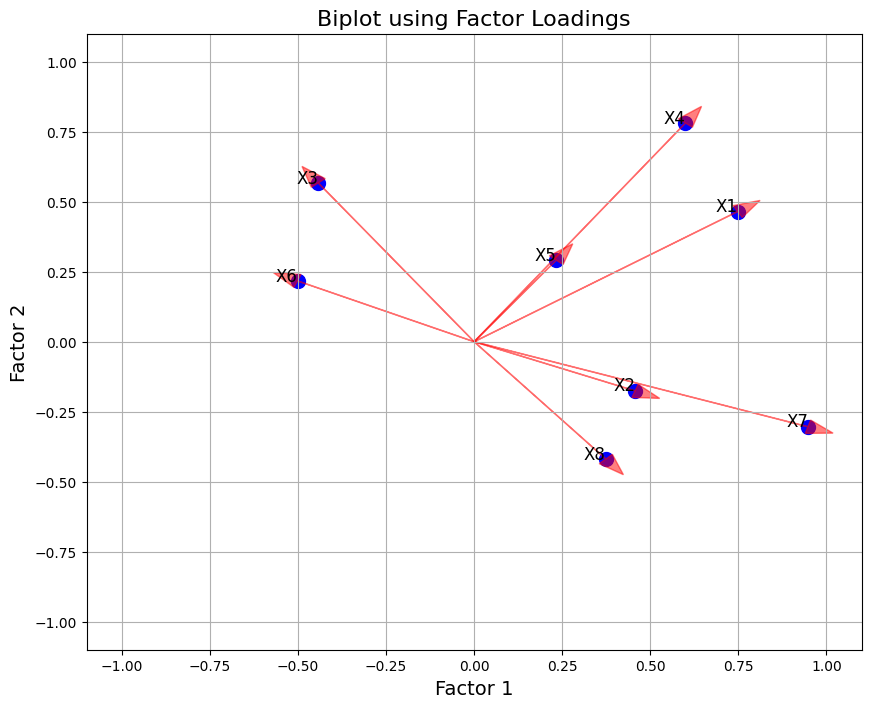

In [46]:
# Biplot 그리기
D1 = loadings[:, :2]
fig, ax = plt.subplots(figsize=(10, 8))
ax.scatter(D1[:, 0], D1[:, 1], color='blue', s=100)  # 점의 색상과 크기 변경

for i in range(D1.shape[0]):
    ax.text(D1[i, 0], D1[i, 1], d1.columns[i], fontsize=12, ha='right')  # 글씨 크기와 정렬 변경

# 축의 범위 설정
ax.set_xlim([-1.1, 1.1])
ax.set_ylim([-1.1, 1.1])

# 축의 제목과 그래프 제목 추가
ax.set_xlabel('Factor 1', fontsize=14)
ax.set_ylabel('Factor 2', fontsize=14)
ax.set_title('Biplot using Factor Loadings', fontsize=16)

# 그리드 추가
ax.grid(True)

# 변수 벡터 추가
for i in range(D1.shape[0]):
    ax.arrow(0, 0, D1[i, 0], D1[i, 1], color='red', alpha=0.5, head_width=0.05)  # 벡터 추가

plt.show()